# Testing Your Software Environment and TCLab

We will use this notebook in the first tutorial to test your software environment and TCLab work.

## Connect to TCLab and Turn On LED

In [1]:
from tclab import TCLab

with TCLab() as lab:
    lab.LED(100) # Set LED to full brightness

TCLab version 1.0.0
Arduino Leonardo connected on port /dev/cu.usbmodemWUART1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.
TCLab disconnected successfully.


## Connect to TCLab and Measure Ambient Temperature

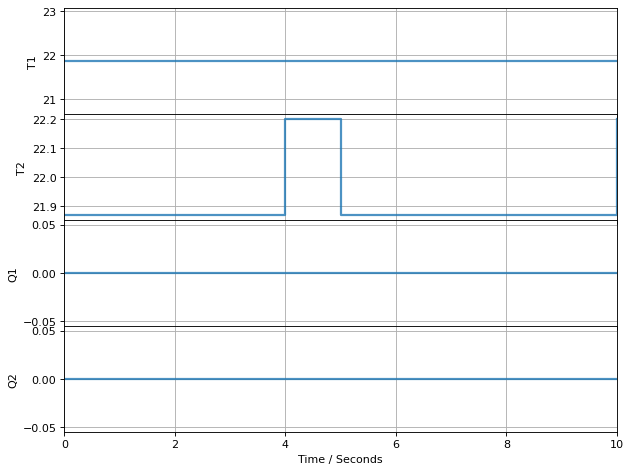

TCLab disconnected successfully.


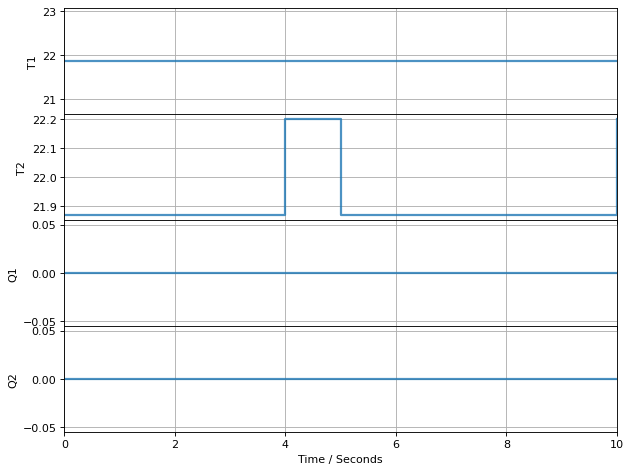

In [2]:
from tclab import TCLab, clock, Historian, Plotter, setup

# experimental parameters
tfinal = 10 # seconds

# perform experiment
with TCLab() as lab:
    lab.U1 = 0
    lab.U2 = 0
    h = Historian(lab.sources)
    p = Plotter(h, tfinal)
    for t in clock(tfinal):
        p.update(t)


## Solve Optimiation Problem in Pyomo

In [4]:
import pyomo.environ as pyo
import idaes

# Create empty Pyomo model
m = pyo.ConcreteModel()

## Declare variables with initial values with bounds
m.x1 = pyo.Var(initialize=1, bounds=(-10, 10))
m.x2 = pyo.Var(initialize=1, bounds=(-10, 10))
m.x3 = pyo.Var(initialize=1, bounds=(-10, 10))

## Declare objective
m.OBJ = pyo.Objective(expr=m.x1**2 + 2*m.x2**2 - m.x3, sense = pyo.minimize)

## Declare equality constraints
m.h1 = pyo.Constraint(expr= m.x1 + m.x2 == 1)
m.h2 = pyo.Constraint(expr= m.x1 + 2*m.x2 - m.x3 == 5)

# Solve with Ipopt
opt1 = pyo.SolverFactory('ipopt')
status1 = opt1.solve(m, tee=True)

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. See http://

## Export Notebook as PDF